# Adversarial Dataset

Extracting Data for generating a Transfer Attack. 

## Imports

### GPU Information

The following GPU is used while Training the Model. Google Colab is used for Training so the GPU might change while running it later.

**GPU-Specifications:**
*   Name: Tesla P100-PCIE
*   GPU Memory: 16280MiB

In [1]:
!nvidia-smi

Mon Aug 23 20:52:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing Data
Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/RadioML-Dataset/Data/PGD-Attack

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/RadioML-Dataset/Data/PGD-Attack


### Importing Libraries

Cleverhans is used for generating Adversarial Examples.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

# Tensorflow Libraries
!pip3 install tensorflow==2.2.0
!pip3 install keras-tuner==1.0.2
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Dense, Flatten, ReLU, Conv2D, Input, MaxPooling2D, BatchNormalization, AveragePooling2D, Reshape, ZeroPadding2D, Dropout, Activation, Permute, Concatenate
from tensorflow.keras.models import Model,Sequential

from SaveData import SaveTrainData, SaveValidData

### Loading Model

In [4]:
# Model
Robust_CNN = tf.keras.models.load_model("../Model/Clean_Robust_CNN.h5")

### Target Encoding

In [5]:
f = open("../Dataset/ModulationMap.pkl", "rb")
ModulationMap = pickle.load(f)
ModulationMap = dict((v,k) for k,v in ModulationMap.items())

# 8PSK is considered as target
TargetLabel = '8PSK'
Target = ModulationMap[TargetLabel]
Target_Encoding = np.zeros((11,))
Target_Encoding[Target] = 1
print ("Target Encoding:", Target_Encoding)

Target Encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Adversarial Dataset Extraction

### Training Dataset

Function to Generate Adversarial Training Data

In [6]:
def Generate_TrainAdversarial(Dataset, Adv_Dataset, PercentageCorruption, SavePath):
    ModulationSchemes = list(Dataset.keys())
    SNRs = list(Dataset[ModulationSchemes[0]].keys())

    Combined_Dataset = {}
    for modType in ModulationSchemes:
        Combined_Dataset[modType] = {}
        for snr in SNRs:
            Data = Dataset[modType][snr]
            Adv_Data = np.array(Adv_Dataset[modType][snr])

            N = Adv_Data.shape[0]
            AdvInd = np.random.choice(N, size = int(N*PercentageCorruption/100.0), replace=False)

            Combined_Dataset[modType][snr] = np.append(Data, Adv_Data[AdvInd], axis=0)

    SaveTrainData(Combined_Dataset, SavePath)

Loading Data

In [7]:
# # Training Clean Dataset
# f = open("../Dataset/TrainDataset.pkl", "rb")
# TrainDataset = pickle.load(f)
# f.close()

# # Training Adversarial Dataset
# f = open("../Dataset/PGD_Adv_TrainDataset.pkl", "rb")
# Adv_TrainDataset = pickle.load(f)
# f.close()

Extraction

In [8]:
# for p in [25,50,75,100]:
#     SavePath = "Adversarial-Data-Train/" + str(p)
#     Generate_TrainAdversarial(TrainDataset, Adv_TrainDataset, p, SavePath)
#     print (str(p) + "% Adversarial Training Data Generated")

### Validation Dataset

Function to Generate Adversarial Validation Data

In [9]:
def Generate_ValidAdversarial(Dataset, Adv_Dataset, SavePath):
    SaveValidData(Adv_Dataset, SavePath)

Loading Data

In [10]:
# Training Clean Dataset
f = open("../Dataset/ValidDataset.pkl", "rb")
ValidDataset = pickle.load(f)
f.close()

# Training Adversarial Dataset
f = open("../Dataset/PGD_Adv_ValidDataset.pkl", "rb")
Adv_ValidDataset = pickle.load(f)
f.close()

Extraction

In [11]:
SavePath = "Adversarial-Data-Valid"
Generate_ValidAdversarial(ValidDataset, Adv_ValidDataset, SavePath)
print ("Adversarial Validation Data Generated")

Adversarial Validation Data Generated


## Testing Model Accuracy

Training Data Accuracy

In [12]:
# Loading Training Data
X_Train = np.load("../Clean-Data/Clean_X_Train.npy")
y_Train = np.load("../Clean-Data/Clean_y_Train.npy")

X_Train = np.expand_dims(np.transpose(X_Train, (0,2,1)),axis=-1)
y_Pred = Robust_CNN.predict(X_Train)

accuracy_score(np.argmax(y_Train,axis=1), np.argmax(y_Pred,axis=1))

0.6073636363636363

Testing Data Accuracy

Evaluating Model
SNR: -20 Accuracy: 0.0
SNR: -18 Accuracy: 0.0
SNR: -16 Accuracy: 0.0
SNR: -14 Accuracy: 0.0
SNR: -12 Accuracy: 0.0
SNR: -10 Accuracy: 0.0
SNR: -8 Accuracy: 0.0
SNR: -6 Accuracy: 0.0
SNR: -4 Accuracy: 0.0
SNR: -2 Accuracy: 0.0
SNR: 0 Accuracy: 0.0
SNR: 2 Accuracy: 0.0
SNR: 4 Accuracy: 0.0
SNR: 6 Accuracy: 0.0
SNR: 8 Accuracy: 0.0
SNR: 10 Accuracy: 0.0
SNR: 12 Accuracy: 0.0
SNR: 14 Accuracy: 0.0
SNR: 16 Accuracy: 0.0
SNR: 18 Accuracy: 0.0


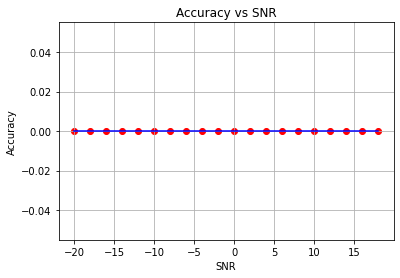

In [13]:
def EvaluateData(Model, X_Valid, y_Valid, SavePath, ValidBatchSize=32):
    Valid_SNR = np.arange(-20,20,2)
    Accuracy = []

    print ("Evaluating Model")
    for snr in Valid_SNR:
        Pred_Labels = np.argmax(Model.predict(X_Valid[snr]),axis=1)
        True_Labels = np.argmax(y_Valid[snr],axis=1)

        Acc = accuracy_score(True_Labels, Pred_Labels)

        print ("SNR:", snr, "Accuracy:", Acc)
        Accuracy.append(Acc)

    Accuracy = np.array(Accuracy)

    plt.figure()
    plt.plot(Valid_SNR,Accuracy, color='blue')
    plt.scatter(Valid_SNR,Accuracy, color='red')
    plt.title("Accuracy vs SNR")
    plt.xlabel("SNR")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.savefig(SavePath)
    plt.savefig(SavePath[:-3] + "eps")
    plt.show()

f = open("Adversarial-Data-Valid/Adversarial_X_Valid.pkl", "rb")
Adversarial_X_Valid = pickle.load(f)
f.close()

f = open("Adversarial-Data-Valid/Adversarial_y_Valid.pkl", "rb")
Adversarial_y_Valid = pickle.load(f)
f.close()

for snr in Adversarial_X_Valid.keys():
    Adversarial_X_Valid[snr] = np.expand_dims(np.transpose(Adversarial_X_Valid[snr], (0,2,1)),axis=-1)

EvaluateData(Robust_CNN, Adversarial_X_Valid, Adversarial_y_Valid, "Robust_CNN_Adv_Accuracy.png")